In [2]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
# 2. Load and clean data
df = pd.read_csv("C:\\Users\\rutuj\\OneDrive\\Desktop\\student\\wave_energy_converter_dataset.csv")

In [5]:
print(df.columns.tolist())

['significant_wave_height', 'wave_period', 'wave_direction', 'sea_state', 'device_pitch', 'device_heave', 'power_output', 'efficiency', 'mooring_tension', 'fault_detected']


In [6]:
# Show basic info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   significant_wave_height  2000 non-null   float64
 1   wave_period              2000 non-null   float64
 2   wave_direction           2000 non-null   float64
 3   sea_state                2000 non-null   int64  
 4   device_pitch             2000 non-null   float64
 5   device_heave             2000 non-null   float64
 6   power_output             2000 non-null   float64
 7   efficiency               2000 non-null   float64
 8   mooring_tension          2000 non-null   float64
 9   fault_detected           2000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 156.4 KB
None


In [7]:
# Show column names
print(df.columns)

Index(['significant_wave_height', 'wave_period', 'wave_direction', 'sea_state',
       'device_pitch', 'device_heave', 'power_output', 'efficiency',
       'mooring_tension', 'fault_detected'],
      dtype='object')


In [8]:
# Show summary stats
print(df.describe())


       significant_wave_height  wave_period  wave_direction    sea_state  \
count              2000.000000  2000.000000     2000.000000  2000.000000   
mean                  2.743825     7.467500      178.663000     1.493500   
std                   1.314980     2.597245      103.662676     1.115607   
min                   0.510000     3.000000        0.000000     0.000000   
25%                   1.570000     5.257500       89.000000     1.000000   
50%                   2.780000     7.435000      177.000000     1.000000   
75%                   3.880000     9.740000      266.250000     2.000000   
max                   5.000000    12.000000      360.000000     3.000000   

       device_pitch  device_heave  power_output   efficiency  mooring_tension  \
count   2000.000000   2000.000000   2000.000000  2000.000000      2000.000000   
mean       4.844335      1.002470    175.333220    49.955410        35.077935   
std        2.835127      0.568573     72.994764    17.509034        14.4

In [9]:
#deleting duplicate columns and rows
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
# 3. Preprocessing
X = df.drop('fault_detected', axis=1)
y = df['fault_detected']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:
# 5. Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.8975
Precision: 0.0
Recall: 0.0


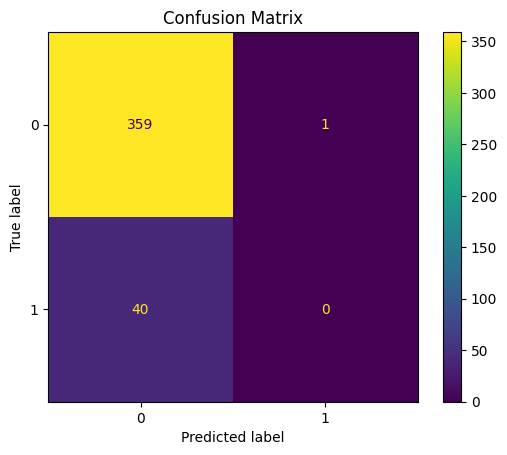

In [13]:
# 6. Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

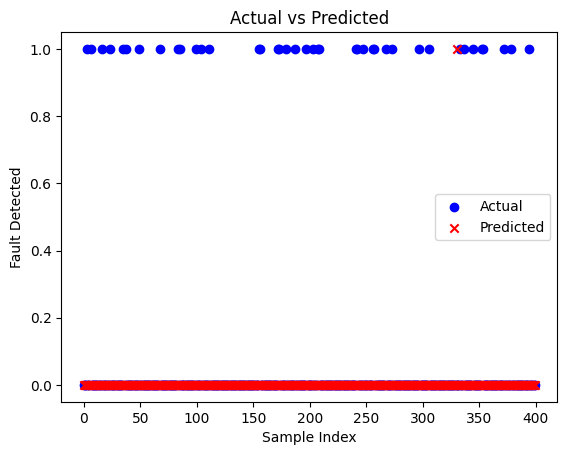

In [14]:
# 7. Prediction Graph
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Fault Detected')
plt.legend()
plt.show()

In [18]:
# 8. Save model and scaler
with open('best_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)